

Kristina Liu


BI 260 HW 2



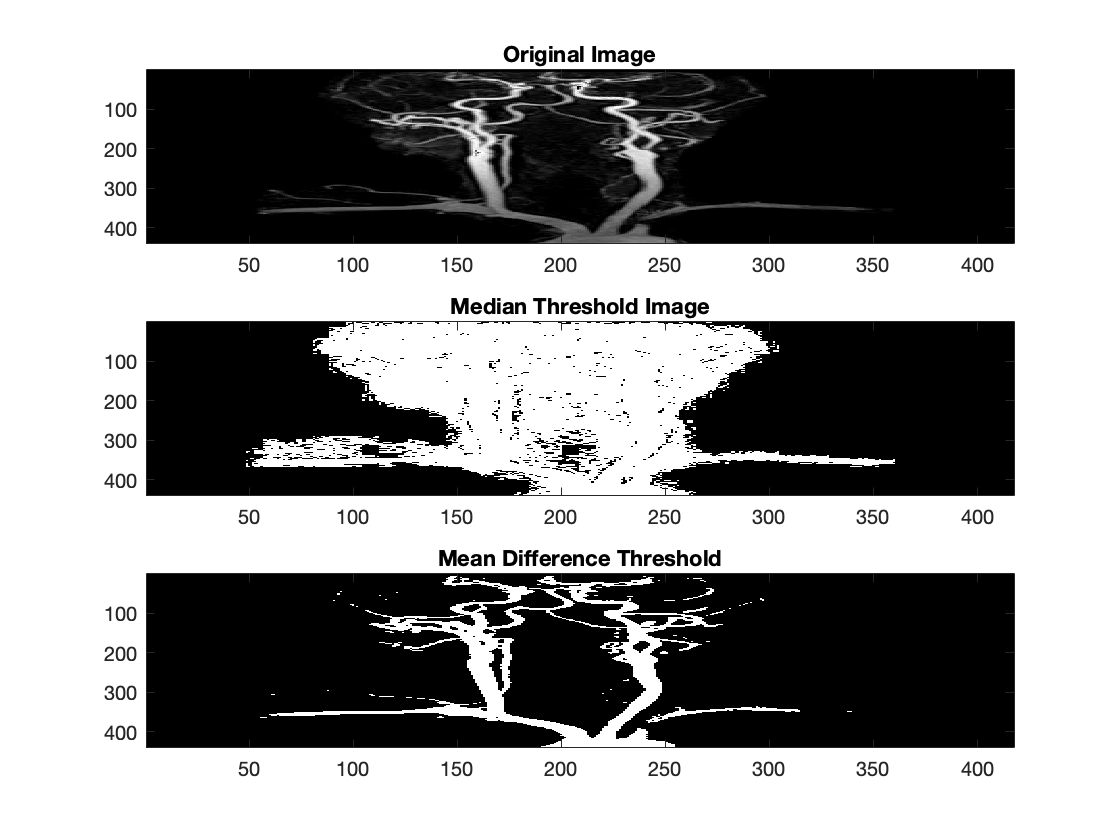

In [1]:
figure()
subplot(3,1,1)
I = imread('MRA-Spine.png');
imagesc(I); colormap gray
title('Original Image')
subplot(3,1,2)
I_med = MedianThreshold('MRA-Spine.png');
imagesc(I_med); colormap gray
title('Median Threshold Image')
subplot(3,1,3)
I_df = MeanDifferenceThreshold('MRA-Spine.png');
imagesc(I_df); colormap gray
title('Mean Difference Threshold')


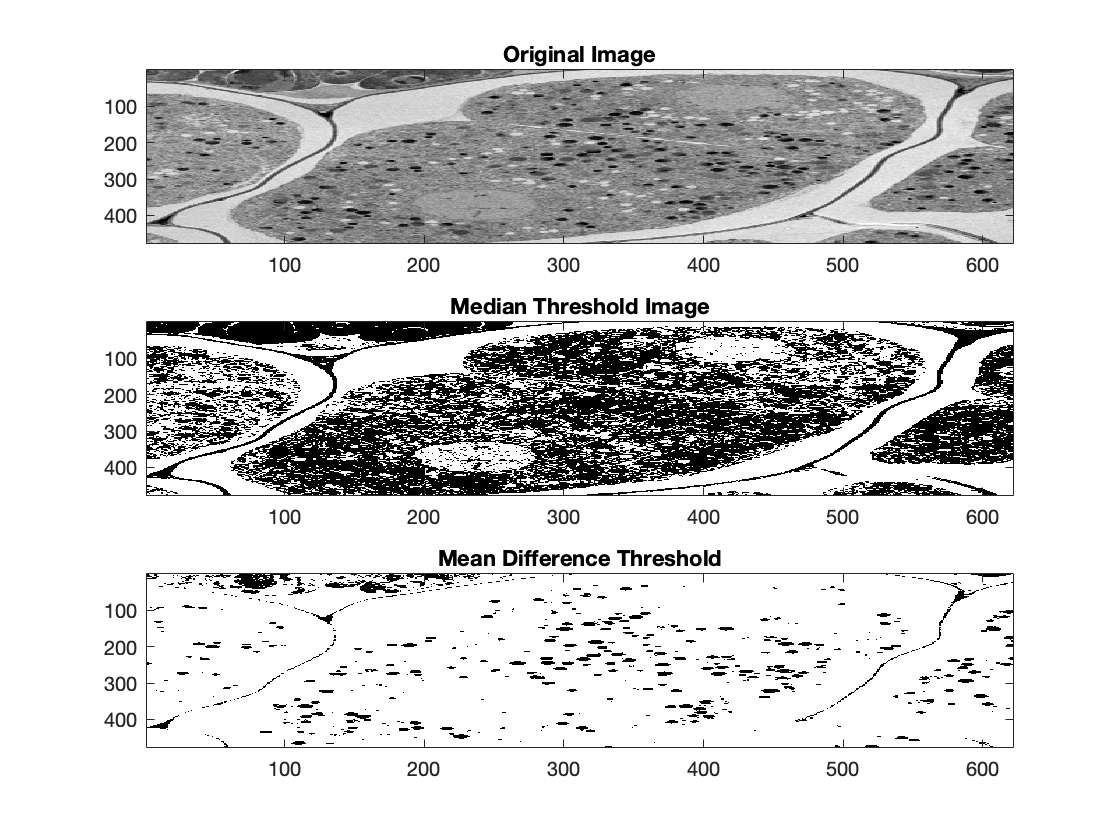

In [2]:
figure()
subplot(3,1,1)
I = imread('cell.png');
imagesc(I); colormap gray
title('Original Image')
subplot(3,1,2)
I_med = MedianThreshold('cell.png');
imagesc(I_med); colormap gray
title('Median Threshold Image')
subplot(3,1,3)
I_df = MeanDifferenceThreshold('cell.png');
imagesc(I_df); colormap gray
title('Mean Difference Threshold')


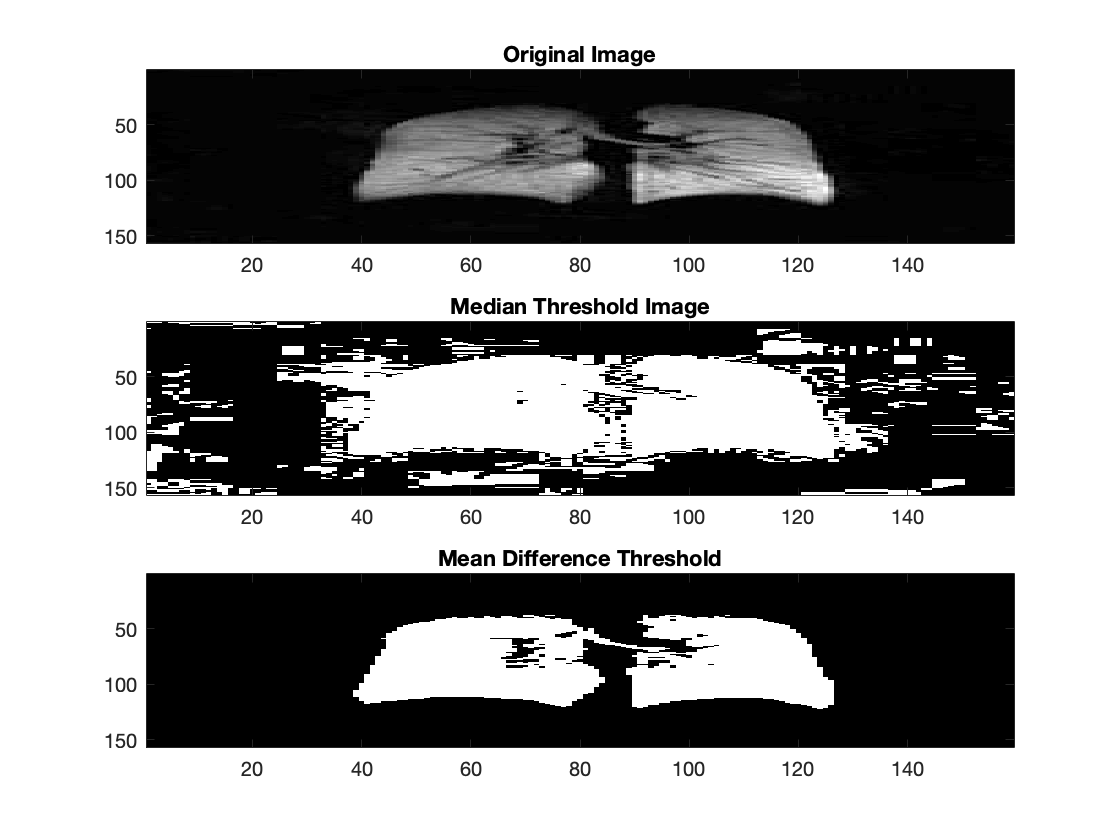

In [3]:
figure()
subplot(3,1,1)
I = imread('lung.png');
imagesc(I); colormap gray
title('Original Image')
subplot(3,1,2)
I_med = MedianThreshold('lung.png');
imagesc(I_med); colormap gray
title('Median Threshold Image')
subplot(3,1,3)
I_df = MeanDifferenceThreshold('lung.png');
imagesc(I_df); colormap gray
title('Mean Difference Threshold')

In [4]:
function I_filtered = MeanDifferenceThreshold(name)
I = imread(name);
[h,edges] = histcounts(I,256);
 sum_h=zeros(1,256);
 sum_h(1)=116630;
 sum_weighted = zeros(1,256);
 for i = 2:256
     sum_h(i)= sum_h(i-1) + h(i);
     intensity = i-1;
     sum_weighted(i) = sum_weighted(i-1)+h(i)*intensity;
     mu_0(i)=(1/sum_h(i))*sum_weighted(i);
 end
 c = 0;
 image = prod(size(I));
 for i = 1:256
     c = c+1;
     h_t = h(c:256);
     sum_h_t(c) = sum(h_t);
     h_tw = h_t.*[c-1:255];
     sum_h_tw(c) = sum(h_tw);
     mu_1(c) = (1/sum_h_t(c))*sum_h_tw(c);
 end
 t = 1;
 c(1) =(sum_h(1)/image)*(sum_h_t(2)/image)*(mu_1(1)-mu_0(1))^2;
 for i=2:256
     t = t+1;
     c(t) = (sum_h(t-1)/image)*(sum_h_t(t)/image)*(mu_1(t-1)-mu_0(t-1))^2;
 end
[max_c,index] = max(c);
    t =index - 1;
    I_filtered = zeros(size(I));
    for i=1:size(I,1)
        for j=1:size(I,2)
            if I(i,j)<=t
                I_filtered(i,j) = 0;
            else
                I_filtered(i,j) = 255;
            end
        end
    end
end
%%
function I_filtered = MedianThreshold(name)
    I = imread(name);
    threshold =median(I,'all');
    I_filtered = zeros(size(I));
    for i=1:size(I,1)
        for j=1:size(I,2)
            if I(i,j)<=threshold
                I_filtered(i,j) = 0;
            else
                I_filtered(i,j) = 255;
            end
        end
    end

end


1) The mean difference filter works best for the MRA\-Spine for separating manneqin from the background. For the cell image, the median threshold image gave a good binary image of the shape of the cells while the mean difference had very few dark pixels (difficult to distinguish shape). For the lung image the median thresholded binary image contained some background values as white while the mean difference did a better job with producing the lung shape with white pixels.


2) The median thresholding would work best with a distribution of pixels where the median is similar to the mean, as in a normal distribution. The mean difference thresholding would work best for images with a distribution shifting the median, or a bimodal distribution.


3) The mean difference equation finds where the probabilities of intensities less than or equal to a threshold value multiplied by the variance between them.

